## Use the wage2 dataset from the Wooldridge python
### (a) Find the average IQ and salary in the sample. What is the sample standard deviation of IQ

In [1]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.formula.api as smf
import wooldridge as woo
wage2 = woo.data("wage2")
wage2.describe

<bound method NDFrame.describe of      wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0     769     40   93   35    12     11       2   31        1      0      0   
1     808     50  119   41    18     11      16   37        1      0      0   
2     825     40  108   46    14     11       9   33        1      0      0   
3     650     40   96   32    12     13       7   32        1      0      0   
4     562     40   74   27    11     14       5   34        1      0      0   
..    ...    ...  ...  ...   ...    ...     ...  ...      ...    ...    ...   
930   520     40   79   28    16      6       1   30        1      1      1   
931  1202     40  102   32    13     10       3   31        1      0      1   
932   538     45   77   22    12     12      10   28        1      1      1   
933   873     44  109   25    12     12      12   28        1      0      1   
934  1000     40  107   32    12     17      18   35        1      0      1   

     urban  sibs 

In [2]:
print("Average IQ equals to %s" % wage2.IQ.mean())
print("Average salary equals to %s" % wage2.wage.mean())
print("Standard deviation of IQ equals to %s" % statistics.stdev(wage2.IQ))

Average IQ equals to 101.28235294117647
Average salary equals to 957.9454545454546
Standard deviation of IQ equals to 15.052636370265098


### (b) Estimate a regression model where a one-point increase in IQ changes wage by a constant dollar amount. Use this model to find the predicted increase in wage for an increase in IQ of 15 points. 

In [3]:
reg = smf.ols("wage~IQ", data = wage2)
results = reg.fit()
print(results.params)
print("Increase in IQ of 15 points, wage will increase in %s" % (8.3*15))
print("R-Squared equals to %s" % results.rsquared)
print("IQ doesn't explain most of the variation in wage" )


Intercept    116.991565
IQ             8.303064
dtype: float64
Increase in IQ of 15 points, wage will increase in 124.50000000000001
R-Squared equals to 0.09553528456778482
IQ doesn't explain most of the variation in wage


### Estimate a model where each one-point increase in IQ has the same percentage effect on wage. If IQ increases by 15 points, what is the approximate percentage increase in wage?

In [4]:
reg_log_linear = smf.ols('np.log(wage)~IQ', data = wage2)
results_log_linear = reg_log_linear.fit()
print(results_log_linear.params)
print("Increase in IQ of 15 points, wage will increase in " + str(00.88*15) + "%")


Intercept    5.886994
IQ           0.008807
dtype: float64
Increase in IQ of 15 points, wage will increase in 13.2%


### (d)Does the intercept in these models have a meaningful interpretation? 

In [5]:
## No. Because a person can't have both a zero IQ and a wage, 
## there are no meaningful interpretation for the intercept.

## 3. Use the wage2 dataset from the Wooldridge python module. Use the regression from question (1) part (c) for any influence diagnostics.

### (a) Generate residuals plot. Include a lowess smoother in this plot.

<function matplotlib.pyplot.show(close=None, block=None)>

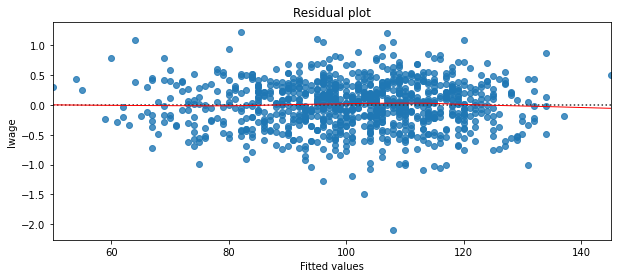

In [6]:
plt.figure(figsize = (10,4))
sns.residplot(x='IQ', y='lwage', data=wage2, lowess=True,
              line_kws={'color':'red','lw':1,'alpha':1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
plt.show

In [48]:
## We can see that most residuals are evenly distributed and close to the lowness smoother.
## This means that the regression is a good fit for our variables.

### (b) (1 point) Generate a Cook’s distance plot. Do you notice any unusual observations?

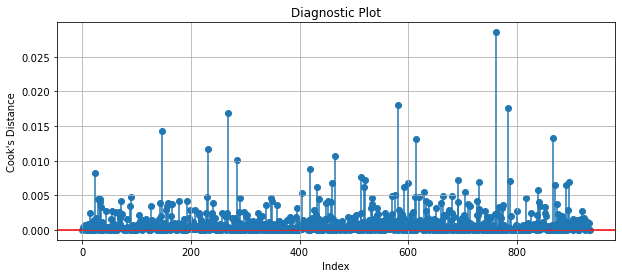

In [7]:
cooks_distance = results_log_linear.get_influence().cooks_distance
plt.figure(figsize = (10,4))
plt.scatter(wage2.index, cooks_distance[0])
plt.axhline(0,color='red')
plt.vlines(x=wage2.index,ymin=0,ymax=cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()

In [63]:
## There are plenty outliers that stand out which means we need to take a closer look and investigate,
## but all distance are much smaller than 0.03, indicating that no value is highly influential. 

### (c) Visualize potential influential observations using DFFITS. 

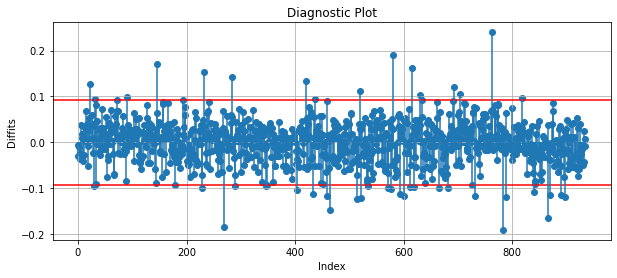

In [8]:
dffits, threshold = results_log_linear.get_influence().dffits
plt.figure(figsize=(10,4))
plt.scatter(wage2.index,dffits)
plt.axhline(threshold,color='red')
plt.axhline(-threshold,color='red')
plt.vlines(x=wage2.index,ymin=0,ymax=dffits)
plt.xlabel('Index')
plt.ylabel('Diffits')
plt.title("Diagnostic Plot")
plt.grid()

In [ ]:
## several observations are outside the threshold, indicating that they might be influential values.

### (d) Set a test threshold and remove suspected outliers using studentized residuals, DFFITS, or Cook’s Distance as the criteria. Fit a regression on the new dataset.

In [9]:
#new regression using cooks cutoff
wage2new = wage2[cooks_distance[0]<4/len(cooks_distance[0])]
reg = smf.ols('lwage ~ IQ', data = wage2new)
resultsnew = reg.fit()
print(resultsnew.summary())

#new regression using dffits cutoff
wage2new2  = wage2[np.abs(dffits)<threshold]
reg2 = smf.ols('lwage ~ IQ', data = wage2new2)
resultsnew2 = reg2.fit()
print(resultsnew2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     133.8
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           6.38e-29
Time:                        14:28:58   Log-Likelihood:                -335.20
No. Observations:                 891   AIC:                             674.4
Df Residuals:                     889   BIC:                             684.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8304      0.084     69.463      0.0

### (e) How the regression results changed. Are the regression parameters stable? Was the fit of regression affected?

original R-Squared equals to 0.09909129613279621
new R-Squared equals to 0.1307985523541263


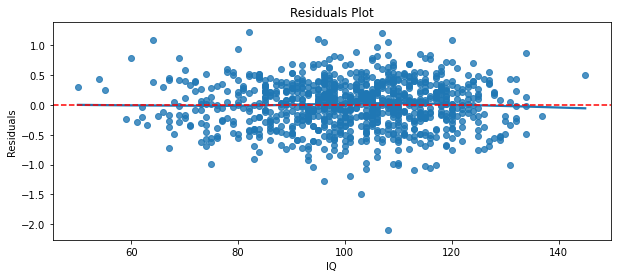

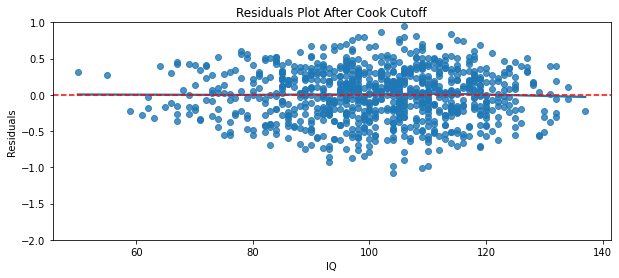

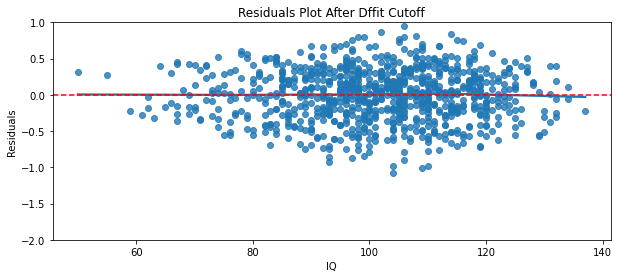

In [10]:
## fit of two regression
print("original R-Squared equals to %s" % results_log_linear.rsquared)
print("new R-Squared equals to %s" % resultsnew.rsquared)
## Original residuals plot
plt.figure(figsize = (10, 4))
sns.regplot(x = wage2.IQ, y = results_log_linear.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()
## Resuduals plot after cook cutoff
plt.figure(figsize = (10, 4))
sns.regplot(x = wage2new.IQ, y = resultsnew.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylim(-2, 1)
plt.ylabel("Residuals")
plt.title("Residuals Plot After Cook Cutoff")
plt.show()
## Residuals plot after dffit cutoff
plt.figure(figsize = (10, 4))
sns.regplot(x = wage2new2.IQ, y = resultsnew2.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylim(-2, 1)
plt.ylabel("Residuals")
plt.title("Residuals Plot After Dffit Cutoff")
plt.show()

In [11]:
## After cuting off the outliers, the intercept changed from 5.88 to 5.83, 
## and the coefficient of IQ changed from 0.0088 to 0.0095.
## As shown in the residuals plot, there are fewer influential values, and the residuals are closer to 0.
## R-square changed from 9.9% to 13.07%, indicating we have reached a fitter result.

### (f) What are some potential concerns that might be balanced when deciding to remove influential observations?

In [ ]:
## Some outliers represent natural variations in the population, and they should be kept in dataset.
## Other outliers are problematic and should be removed because they represent measurement errors, 
## data processing or sampling problems.